## Averaging over days

In [2]:
import sys
import os
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)
import file_handling as fh

fh.disable_warnings()
path = '/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05'
data = fh.disk_data_from_keywords(path, ['DOM01', 'domainmean'])
data

Any code that generates warnings will no longer print them to the console.


<xarray.Dataset>
Dimensions:        (time: 2210, quantile: 8)
Coordinates:
  * time           (time) datetime64[ns] 2020-01-09T10:00:00 ... 2020-01-17T0...
  * quantile       (quantile) float64 -1.0 0.0 0.05 0.25 0.5 0.75 0.95 1.0
Data variables: (12/24)
    u_10m          (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    v_10m          (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    rh_2m          (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    t_2m           (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    qv_2m          (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    t_seasfc       (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    ...             ...
    thb_t          (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    tqi            (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    tqs            (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    sou_s          (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    sob_s          (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
    thb_s          (quantile, time) float64 dask.array<chunksize=(8, 6), meta=np.ndarray>
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          6b59890b-99f3-939b-e76a-0a3ad2e43140
    uuidOfParHGrid:       39f9d5e2-322c-11e6-beee-d15f30d0a215

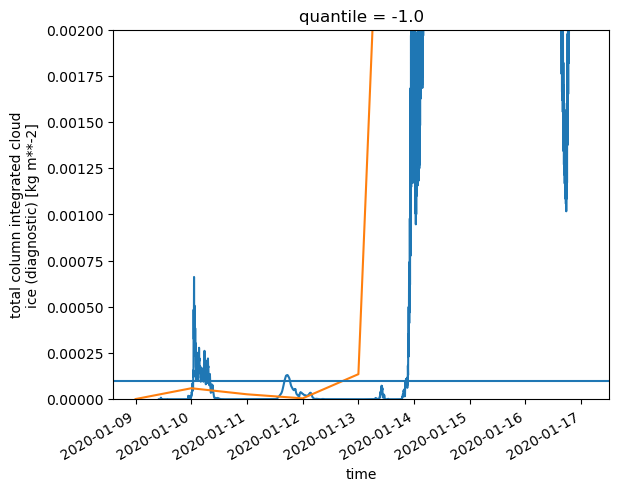

In [3]:
import matplotlib.pyplot as plt

daily_averages = data.resample(time='D').mean(keep_attrs=True)

fig, ax  = plt.subplots()
data['tqi_dia'].sel({'quantile':-1}).plot(ax=ax)
daily_averages['tqi_dia'].sel({'quantile':-1}).plot(ax=ax)
ax.axhline(1e-4)
ax.set_ylim(0,0.002)
fig.show()

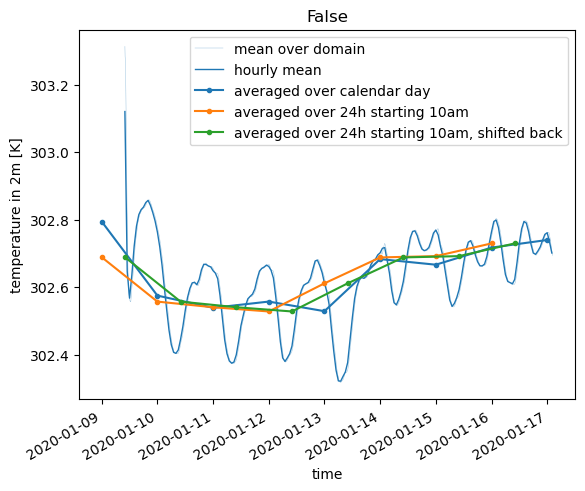

In [4]:
import xarray as xr
import pandas as pd

var = 't_2m'
recenter = False
fig, ax  = plt.subplots()

data[var].sel({'quantile':-1}).plot(ax=ax, label='mean over domain', color='tab:blue', lw=0.3, alpha=.5)

daily_averages = data.resample(time='H').mean(keep_attrs=True)
daily_averages[var].sel({'quantile':-1}).plot(ax=ax, label='hourly mean', color='tab:blue', lw=1, alpha=1)

daily_averages = data.resample(time='D').mean(keep_attrs=True)
if recenter: daily_averages = daily_averages.assign_coords(time=daily_averages['time'] + pd.Timedelta(hours=12)) # center value over day for plotting
daily_averages[var].sel({'quantile':-1}).plot(ax=ax, label='averaged over calendar day', marker='.')

shifted_ds = data.assign_coords(time=data['time'] - pd.Timedelta(hours=10))
daily_averages = shifted_ds.resample(time='D').mean()
if recenter: daily_averages = daily_averages.assign_coords(time=daily_averages['time'] + pd.Timedelta(hours=12)) # center value over day for plotting
daily_averages[var].sel({'quantile':-1}).plot(ax=ax, label='averaged over 24h starting 10am', marker='.')

daily_averages = daily_averages.assign_coords(time=daily_averages['time'] + pd.Timedelta(hours=10))
if recenter: daily_averages = daily_averages.assign_coords(time=daily_averages['time'] + pd.Timedelta(hours=12)) # center value over day for plotting
daily_averages[var].sel({'quantile':-1}).plot(ax=ax, label='averaged over 24h starting 10am, shifted back', marker='.')

# ax.axhline(1e-4)
# ax.set_ylim(0,0.002)
ax.set_title(recenter)
ax.legend()
fig.show()

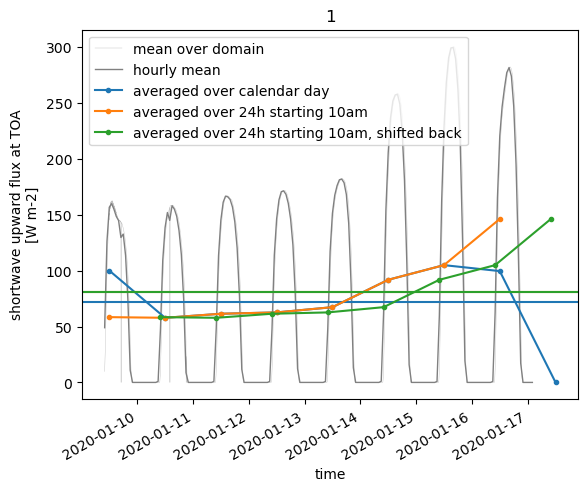

In [5]:
import xarray as xr
import pandas as pd
import numpy as np

var = 'sou_t'
recenter = 1
fig, ax  = plt.subplots()

color = 'grey'
data[var].sel({'quantile':-1}).plot(ax=ax, label='mean over domain', color=color, lw=0.3, alpha=.5)
daily_averages = data.resample(time='H').mean(keep_attrs=True)
daily_averages[var].sel({'quantile':-1}).plot(ax=ax, label='hourly mean', color=color, lw=1, alpha=1)

color = 'tab:blue'
daily_averages = data.resample(time='D').mean(keep_attrs=True)
if recenter: daily_averages = daily_averages.assign_coords(time=daily_averages['time'] + pd.Timedelta(hours=12)) # center value over day for plotting
ax.axhline(np.mean(daily_averages[var].sel({'quantile':-1}).values), color=color)
daily_averages[var].sel({'quantile':-1}).plot(ax=ax, label='averaged over calendar day', marker='.', color=color)

color='tab:orange'
shifted_ds = data.assign_coords(time=data['time'] - pd.Timedelta(hours=10))
daily_averages = shifted_ds.resample(time='D').mean()
if recenter: daily_averages = daily_averages.assign_coords(time=daily_averages['time'] + pd.Timedelta(hours=12)) # center value over day for plotting
ax.axhline(np.mean(daily_averages[var].sel({'quantile':-1}).values), color=color)
daily_averages[var].sel({'quantile':-1}).plot(ax=ax, label='averaged over 24h starting 10am', marker='.', color=color)

color='tab:green'
daily_averages = daily_averages.assign_coords(time=daily_averages['time'] + pd.Timedelta(hours=10))
if recenter: daily_averages = daily_averages.assign_coords(time=daily_averages['time'] + pd.Timedelta(hours=12)) # center value over day for plotting
ax.axhline(np.mean(daily_averages[var].sel({'quantile':-1}).values), color=color)
daily_averages[var].sel({'quantile':-1}).plot(ax=ax, label='averaged over 24h starting 10am, shifted back', marker='.', color=color)

# ax.axhline(1e-4)
# ax.set_ylim(0,0.002)
ax.set_title(recenter)
ax.legend()
fig.show()

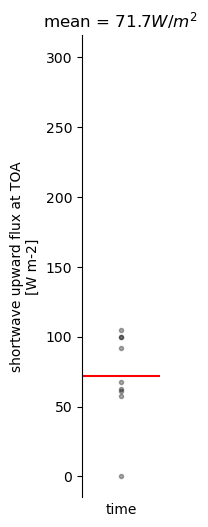

In [12]:
import matplotlib.pyplot as plt
import plot_utils as pu

def get_eureca_dommean():
    path = '/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05'
    data = fh.disk_data_from_keywords(path, ['DOM01', 'domainmean'])
    return data

def ax_eureca_scatter(ax):
    data = get_eureca_dommean()
    var = 'sou_t'
    color = 'grey'
    data[var].sel({'quantile':-1}).plot(ax=ax, label='mean over domain', color=color, lw=0.3, alpha=.5)
    daily_averages = data.resample(time='D').mean(keep_attrs=True)
    daily_averages = daily_averages[var].sel({'quantile':-1}).values
    ax.scatter([1]*len(daily_averages), daily_averages, marker='.', color='black', alpha=0.33)
    ax.axhline(np.mean(daily_averages), color='red')
    ax = pu.remove_spines(ax, ['right','top', 'bottom'])
    ax = pu.remove_ticks(ax, ['top', 'bottom','right'])
    ax.set_xlim(0.9,1.1)
    ax.set_title(f'mean = {np.mean(daily_averages):.1f}$W/m^2$')

fig, ax  = plt.subplots(figsize=(1,6))
ax = ax_eureca_scatter(ax)
fig.show()

In [15]:
import sys
import os
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)
import file_handling as fh
import postprocessing as pp
import xarray as xr

def load_data(exp_dir = '/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/', domain='DOM01', add_control=False):
    datasets = list()
    for kind in ['surface', 'radiation']:
        data = fh.disk_data_from_keywords(exp_dir, [kind, domain])
        data = pp.clean_surface_data(data)
        datasets.append(data)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.merge(datasets)
    if add_control:
        data = data.expand_dims(exp=('warming',))
        data = add_control(data, domain=domain)
    data = data.isel(time=slice(0,100)) ####################DB
    data = pp.add_grid(data)
    data = pp.cut_borders(data)
    return data

def add_control(input_data, domain='DOM01'):
    datasets = list()
    for kind in ['surface', 'radiation']:
        data = fh.eureca_data_from_keywords([kind, domain])
        datasets.append(data)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.merge(datasets)
    data = data.expand_dims(exp=('control',))

    datasets = [input_data, data]
    datasets = pp.filter_common_vars(datasets)
    datasets = pp.subset_time_overlap(datasets)
    return xr.concat(datasets, dim='exp')

def add_icecloud_mask(dataset):
    return pp.add_threshold_indicator(dataset, variable_name='tqi_dia', threshold=1e-4, new_variable_name='high_tqi', long_name='ice cloud mask', boolean=False)


def add_icecloud_mask(dataset):
    return pp.add_threshold_indicator(dataset, variable_name='tqi_dia', threshold=1e-4, new_variable_name='high_tqi', long_name='ice cloud mask', boolean=False)

data = load_data()
data = add_icecloud_mask(data)
data = data.where((data['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
print('takes roughly 5minutes to load full dataset')
data

takes roughly 5minutes to load full dataset


<xarray.Dataset>
Dimensions:        (time: 100, cell: 2154774)
Coordinates:
    lat            (cell) float64 9.501 9.5 9.507 9.515 ... 13.02 13.01 13.01
    lon            (cell) float64 -47.75 -47.76 -47.77 ... -51.36 -51.36 -51.37
  * cell           (cell) int64 396191 396193 396214 ... 4469909 4469910 4469911
  * time           (time) datetime64[ns] 2020-01-09T10:00:00 ... 2020-01-09T1...
Data variables: (12/24)
    u_10m          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    v_10m          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    rh_2m          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    t_2m           (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    qv_2m          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    t_seasfc       (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    ...             ...
    sob_t          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    sod_t          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    thb_t          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    sou_s          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    sob_s          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    thb_s          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          6b59890b-99f3-939b-e76a-0a3ad2e43140
    uuidOfParHGrid:       39f9d5e2-322c-11e6-beee-d15f30d0a215

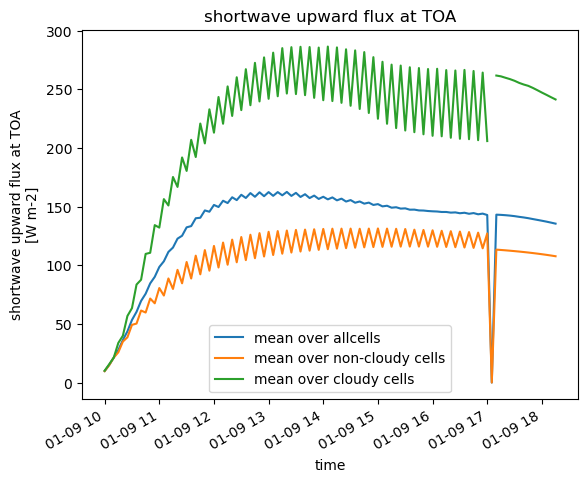

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
var = 'sou_t'


d = data.mean(dim=['cell'], keep_attrs=True)
d[var].plot(ax=ax, label='mean over allcells')

d = data.where((data['clct'] == 0.0).compute())
d = d.mean(dim=['cell'], keep_attrs=True)
d[var].plot(ax=ax, label='mean over non-cloudy cells')

d = data.where((data['clct'] != 0.0).compute())
d = d.mean(dim=['cell'], keep_attrs=True, skipna=True)
d[var].plot(ax=ax, label='mean over cloudy cells')

ax.legend()
ax.set_title(d[var].attrs['long_name'])
fig.show()

In [17]:
import sys
import os
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)
import file_handling as fh
import postprocessing as pp
import xarray as xr

def load_data(exp_dir = '/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/', domain='DOM01', add_control=False):
    datasets = list()
    for kind in ['surface', 'radiation']:
        data = fh.disk_data_from_keywords(exp_dir, [kind, domain])
        data = pp.clean_surface_data(data)
        datasets.append(data)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.merge(datasets)
    if add_control:
        data = data.expand_dims(exp=('warming',))
        data = add_control(data, domain=domain)
    data = data.isel(time=slice(0,100)) ####################DB
    data = pp.add_grid(data)
    data = pp.cut_borders(data)
    return data

def add_control(input_data, domain='DOM01'):
    datasets = list()
    for kind in ['surface', 'radiation']:
        data = fh.eureca_data_from_keywords([kind, domain])
        datasets.append(data)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.merge(datasets)
    data = data.expand_dims(exp=('control',))

    datasets = [input_data, data]
    datasets = pp.filter_common_vars(datasets)
    datasets = pp.subset_time_overlap(datasets)
    return xr.concat(datasets, dim='exp')

def add_icecloud_mask(dataset):
    return pp.add_threshold_indicator(dataset, variable_name='tqi_dia', threshold=1e-4, new_variable_name='high_tqi', long_name='ice cloud mask', boolean=False)

data = load_data(domain='DOM02')
data = add_icecloud_mask(data)
data = data.where((data['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
# print('takes roughly 5minutes')
data

<xarray.Dataset>
Dimensions:        (time: 100, cell: 8618758)
Coordinates:
    lat            (cell) float64 9.502 9.501 9.502 9.5 ... 13.02 13.01 13.02
    lon            (cell) float64 -47.75 -47.75 -47.76 ... -51.37 -51.37 -51.37
  * cell           (cell) int64 151777 151778 151779 ... 11779447 11779448
  * time           (time) datetime64[ns] 2020-01-16T13:35:00 ... 2020-01-16T2...
Data variables: (12/23)
    u_10m          (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    v_10m          (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    rh_2m          (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    t_2m           (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    qv_2m          (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    t_seasfc       (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    ...             ...
    sou_t          (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    sod_t          (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    thb_t          (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    sou_s          (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    sob_s          (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
    thb_s          (time, cell) float32 dask.array<chunksize=(6, 8618758), meta=np.ndarray>
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          3c7523ba-f78c-c23e-6654-012805ba3300
    uuidOfParHGrid:       6b59890b-99f3-939b-e76a-0a3ad2e43140

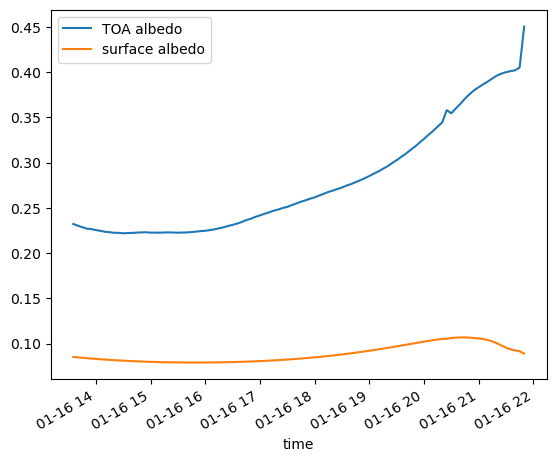

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
(data['sou_t'].mean(dim='cell', keep_attrs=True) / data['sod_t'].mean(dim='cell', keep_attrs=True)).plot(ax=ax, label='TOA albedo')
(data['sou_s'].mean(dim='cell', keep_attrs=True) / (data['sob_s'].mean(dim='cell', keep_attrs=True) -  data['sou_s'].mean(dim='cell', keep_attrs=True))).plot(ax=ax, label='surface albedo')
ax.legend()
fig.show()

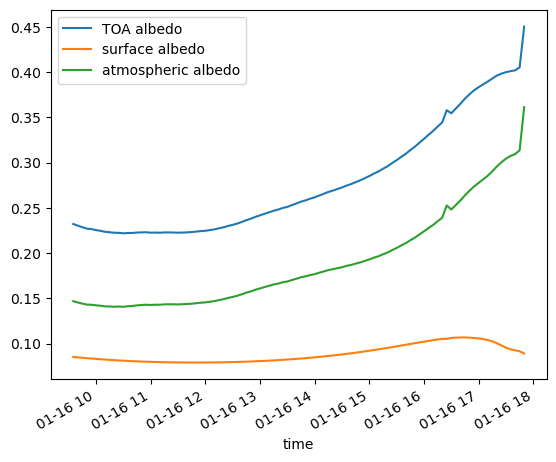

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()
d = data.assign_coords(time=data['time'] - pd.Timedelta(hours=4)) # barbados is UTC-4
d = d.mean(dim='cell', keep_attrs=True)
albedo_toa = (d['sou_t'] / d['sod_t'])
albedo_surf = (d['sou_s'] / (d['sob_s'] -  d['sou_s']))
albedo_toa.plot(ax=ax, label='TOA albedo')
albedo_surf.plot(ax=ax, label='surface albedo')
(albedo_toa - albedo_surf).plot(ax=ax, label='atmospheric albedo')
ax.legend()
fig.show()

In [20]:
for var in list(data):
    print(var.ljust(13), ':', data[var].attrs['long_name'])

u_10m         : zonal wind in 10m
v_10m         : meridional wind in 10m
rh_2m         : relative humidity in 2m
t_2m          : temperature in 2m
qv_2m         : specific water vapor content in 2m
t_seasfc      : sea surface temperature
shfl_s        : surface sensible heat flux
lhfl_s        : surface latent heat flux
tqi           : total column integrated cloud ice
tqs           : total column integrated snow
tqv_dia       : total column integrated water vapour (diagnostic)
tqc_dia       : total column integrated cloud water (diagnostic)
tqi_dia       : total column integrated cloud ice (diagnostic)
rain_gsp_rate : gridscale rain rate
tot_prec      : total precip
clct          : total cloud cover
pres_sfc      : surface pressure
sou_t         : shortwave upward flux at TOA
sod_t         : downward shortwave flux at TOA
thb_t         : thermal net flux at TOA
sou_s         : shortwave upward flux at surface
sob_s         : shortwave net flux at surface
thb_s         : longwave net f

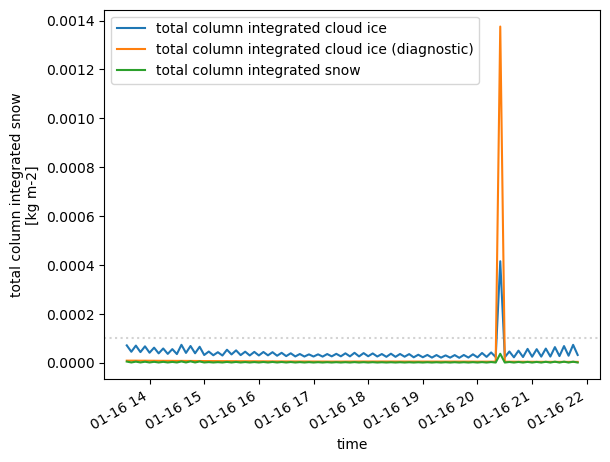

In [21]:
fig, ax = plt.subplots()
ax.axhline(1e-4, ls=':', color='lightgrey')
for var in ['tqi', 'tqi_dia', 'tqs']:
    data.mean(dim='cell', keep_attrs=True)[var].plot(ax=ax, label=data[var].attrs['long_name'])
ax.legend()
fig.show()

I added a few output variables to answer two questions:
- Should I also filter out cells containing snow? (*column integrated snow*, *column integrated ice, non-diagnostic*)
- What is the contribution of the surface to the overall albedo?

In [22]:
data.mean(dim='cell', keep_attrs=True)

<xarray.Dataset>
Dimensions:        (time: 100)
Coordinates:
  * time           (time) datetime64[ns] 2020-01-16T13:35:00 ... 2020-01-16T2...
Data variables: (12/23)
    u_10m          (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    v_10m          (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    rh_2m          (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    t_2m           (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    qv_2m          (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    t_seasfc       (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    ...             ...
    sou_t          (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    sod_t          (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    thb_t          (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    sou_s          (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    sob_s          (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    thb_s          (time) float32 dask.array<chunksize=(6,), meta=np.ndarray>
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          3c7523ba-f78c-c23e-6654-012805ba3300
    uuidOfParHGrid:       6b59890b-99f3-939b-e76a-0a3ad2e43140

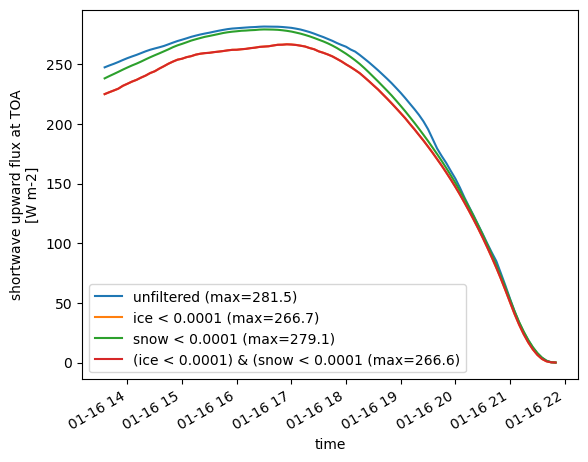

In [23]:
import numpy as np

def add_ice_mask(dataset, threshold=1e-4):
    return pp.add_threshold_indicator(dataset, variable_name='tqi_dia', threshold=threshold, new_variable_name='high_tqi', long_name='ice cloud mask', boolean=False)

def add_snow_mask(dataset, threshold=1e-4):
    return pp.add_threshold_indicator(dataset, variable_name='tqs', threshold=threshold, new_variable_name='high_tqs', long_name='ice cloud mask', boolean=False)

data = load_data(domain='DOM02')
fig, ax = plt.subplots()
var = 'sou_t'
threshold = 1e-4

label = 'unfiltered'
# print(label)
dd = data.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

label = f'ice < {threshold}'
d = add_ice_mask(data, threshold=threshold)
d = d.where((d['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
dd = d.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

label = f'snow < {threshold}'
d = add_snow_mask(data, threshold=threshold)
d = d.where((d['high_tqs'] == 0).compute()).drop_vars(['high_tqs'])
dd = d.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

label = f'(ice < {threshold}) & (snow < {threshold}'
d = add_snow_mask(data, threshold=threshold)
d = add_ice_mask(d, threshold=threshold)
d = d.where((d['high_tqs'] == 0).compute()).drop_vars(['high_tqs'])
d = d.where((d['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
dd = d.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

ax.legend()
fig.show()

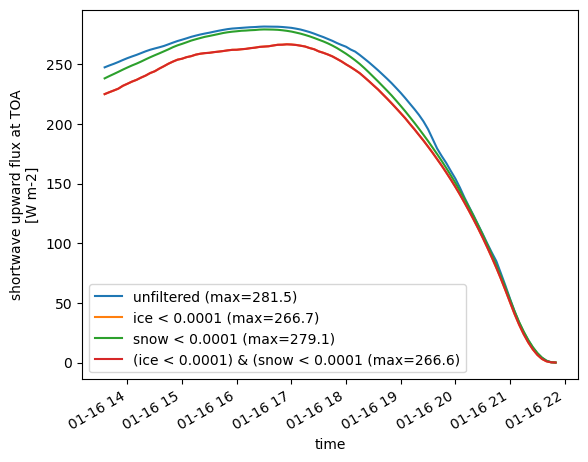

In [24]:
import numpy as np

def add_ice_mask(dataset, threshold=1e-4):
    return pp.add_threshold_indicator(dataset, variable_name='tqi_dia', threshold=threshold, new_variable_name='high_tqi', long_name='ice cloud mask', boolean=False)

def add_snow_mask(dataset, threshold=1e-4):
    return pp.add_threshold_indicator(dataset, variable_name='tqs', threshold=threshold, new_variable_name='high_tqs', long_name='ice cloud mask', boolean=False)

data = load_data(domain='DOM02')
fig, ax = plt.subplots()
var = 'sou_t'
threshold = 1e-4

label = 'unfiltered'
# print(label)
dd = data.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

label = f'ice < {threshold}'
d = add_ice_mask(data, threshold=threshold)
d = d.where((d['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
dd = d.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

label = f'snow < {threshold}'
d = add_snow_mask(data, threshold=threshold)
d = d.where((d['high_tqs'] == 0).compute()).drop_vars(['high_tqs'])
dd = d.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

label = f'(ice < {threshold}) & (snow < {threshold}'
d = add_snow_mask(data, threshold=threshold)
d = d.where((d['high_tqs'] == 0).compute()).drop_vars(['high_tqs'])
d = add_ice_mask(d, threshold=threshold)
d = d.where((d['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
dd = d.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

ax.legend()
fig.show()

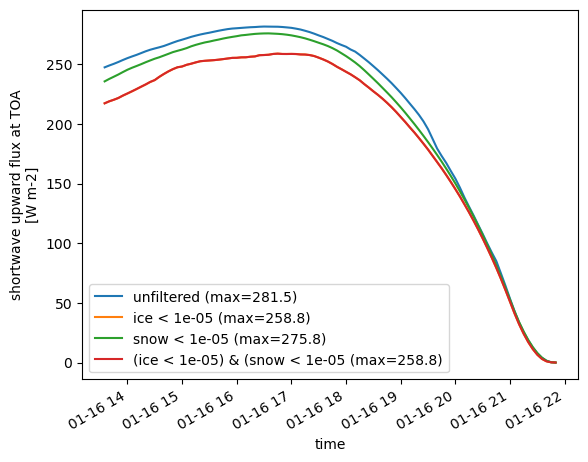

In [25]:
import numpy as np

def add_ice_mask(dataset, threshold=1e-4):
    return pp.add_threshold_indicator(dataset, variable_name='tqi_dia', threshold=threshold, new_variable_name='high_tqi', long_name='ice cloud mask', boolean=False)

def add_snow_mask(dataset, threshold=1e-4):
    return pp.add_threshold_indicator(dataset, variable_name='tqs', threshold=threshold, new_variable_name='high_tqs', long_name='ice cloud mask', boolean=False)

data = load_data(domain='DOM02')
fig, ax = plt.subplots()
var = 'sou_t'
threshold = 1e-5

label = 'unfiltered'
# print(label)
dd = data.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

label = f'ice < {threshold}'
d = add_ice_mask(data, threshold=threshold)
d = d.where((d['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
dd = d.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

label = f'snow < {threshold}'
d = add_snow_mask(data, threshold=threshold)
d = d.where((d['high_tqs'] == 0).compute()).drop_vars(['high_tqs'])
dd = d.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

label = f'(ice < {threshold}) & (snow < {threshold}'
d = add_snow_mask(data, threshold=threshold)
d = d.where((d['high_tqs'] == 0).compute()).drop_vars(['high_tqs'])
d = add_ice_mask(d, threshold=threshold)
d = d.where((d['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
dd = d.mean(dim='cell', keep_attrs=True)[var]
label += f' (max={np.max(dd.values):.1f})'
dd.plot(ax=ax, label=label)

ax.legend()
fig.show()

<xarray.Dataset>
Dimensions:        (cell: 2154774, time: 100)
Coordinates:
    lat            (cell) float64 9.501 9.5 9.507 9.515 ... 13.02 13.01 13.01
    lon            (cell) float64 -47.75 -47.76 -47.77 ... -51.36 -51.36 -51.37
  * cell           (cell) int64 396191 396193 396214 ... 4469909 4469910 4469911
  * time           (time) datetime64[ns] 2020-01-09T10:00:00 ... 2020-01-09T1...
Data variables: (12/24)
    u_10m          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    v_10m          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    rh_2m          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    t_2m           (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    qv_2m          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    t_seasfc       (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    ...             ...
    sob_t          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    sod_t          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    thb_t          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    sou_s          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    sob_s          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    thb_s          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          6b59890b-99f3-939b-e76a-0a3ad2e43140
    uuidOfParHGrid:       39f9d5e2-322c-11e6-beee-d15f30d0a215

## Albedo as ratio of reflected shortwave radiation $SW_{out}/SW_{in}$

In [3]:
import sys
import os
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)

import xarray as xr
import file_handling as fh
import postprocessing as pp
import metpy.units 

def add_division_variable(dataset, dividend_name, divisor_name, new_var_name=None):
    """
    Adds a new variable to the xarray dataset that is the division of two existing variables.
    
    Attributes from the first variable are copied to the new variable with modifications. Designed for albedo

    Parameters:
    - ds: xarray.Dataset
        The dataset to modify.
    - var_name: str
        The name of the numerator variable.
    - divisor_name: str
        The name of the divisor variable.
    - new_var_name: str
        The name for the new variable.

    Returns:
    - xarray.Dataset
        The dataset with the new variable added.
    """
    if dividend_name not in dataset or divisor_name not in dataset:
        raise ValueError(f"Variables {dividend_name} and/or {divisor_name} not found in the dataset.")
    if new_var_name == None: new_var_name = f"{dividend_name}' / {divisor_name}"
    
    dataset[new_var_name] = dataset[dividend_name] / dataset[divisor_name]
    
    original_attrs = dataset[divisor_name].attrs.copy()
    original_attrs['long_name'] = f"{new_var_name} ({dividend_name} / {divisor_name})"
    dividend_unit = metpy.units.units(dataset[dividend_name].attrs['units'])
    divisor_unit  = metpy.units.units(dataset[divisor_name].attrs['units'])
    new_unit = str((dividend_unit / divisor_unit).units)
    original_attrs['units'] = f"{new_unit}"
    dataset[new_var_name].attrs = original_attrs
    return dataset

def add_albedo(dataset):
    return pp.add_division_variable(dataset, dividend_name='sou_t', divisor_name='sod_t', new_var_name='albedo')

def filter_ice(dataset, threshold=1e-4):
    data = pp.add_threshold_indicator(dataset, variable_name='tqi_dia', threshold=threshold, new_variable_name='high_tqi', long_name='ice cloud mask', boolean=False)
    # data = add_ice_mask(data, threshold=threshold)
    data = data.where((data['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
    return data

def load_data(exp_dir = '/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/', domain='DOM01', add_control=False):
    datasets = list()
    for kind in ['surface', 'radiation']:
        data = fh.disk_data_from_keywords(exp_dir, [kind, domain])
        data = pp.clean_surface_data(data)
        datasets.append(data)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.merge(datasets)
    if add_control:
        data = data.expand_dims(exp=('warming',))
        data = add_control(data, domain=domain)
    data = data.isel(time=slice(800,900)) ####################DB
    data = pp.add_grid(data, clean=False, drop_vars=False)
    data = pp.cut_borders(data, varnames={'cell':'cell', 'latitude':'clat', 'longitude':'clon'})
    data = filter_ice(data)
    return data

import importlib; importlib.reload(pp)
fh.disable_warnings()
data = load_data(domain='DOM01')
data = add_albedo(data)
data

Any code that generates warnings will no longer print them to the console.


AttributeError: module 'postprocessing' has no attribute 'add_division_variable'

In [14]:
pp.cut_borders??

Signature:
pp.cut_borders(
    dataset,
    borders=False,
    varnames={'cell': 'cell', 'longitude': 'lon', 'latitude': 'lat'},
)
Source:   
def cut_borders(dataset, borders=False, varnames={'cell':'cell','longitude':'lon','latitude':'lat'}):
    """
    Extract data within a specified border rectangle.

    If no borders are provided, it uses the default rectangle for 'DOM02'.

    Args:
        dataset (xr.Dataset): The dataset containing the data to be extracted.
        borders (matplotlib.patches.Rectangle, optional): The border rectangle to extract data within (default is None, which means using the default rectangle for 'DOM02').

    Returns:
        xr.Dataset: A subset of the input dataset containing data within the specified border rectangle.

    Example:
        >>> # Extract data within border rectangle
        >>> dataset = xr.open_dataset("data.nc")
        >>> borders = default_cutout_rectangle('DOM02')
        >>> extracted_data = cut_borders(dataset, borders)
      

## Separate signal for cloudy and clear sky conditions

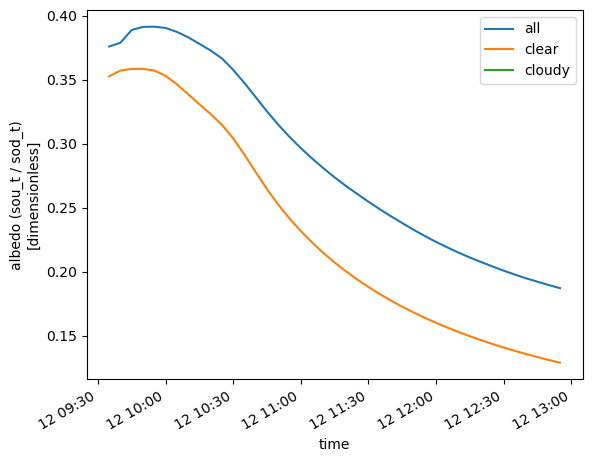

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data.mean(dim='cell', skipna=True, keep_attrs=True)['albedo'].plot(ax=ax, label='all')
data.where(data.clct == 0).mean(dim='cell', skipna=True, keep_attrs=True)['albedo'].plot(ax=ax, label='clear')
data.where(data.clct == 1).mean(dim='cell', skipna=True, keep_attrs=True)['albedo'].plot(ax=ax, label='cloudy')
ax.legend()
fig.show()

In [16]:
var1 = 'clct'
var2 = 'albedo'
data.where(data[var1] == 1).min(dim='cell', skipna=True, keep_attrs=True)[var2].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [17]:
data.where(data[var1] == 1).max(dim='cell', skipna=True, keep_attrs=True)[var2].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

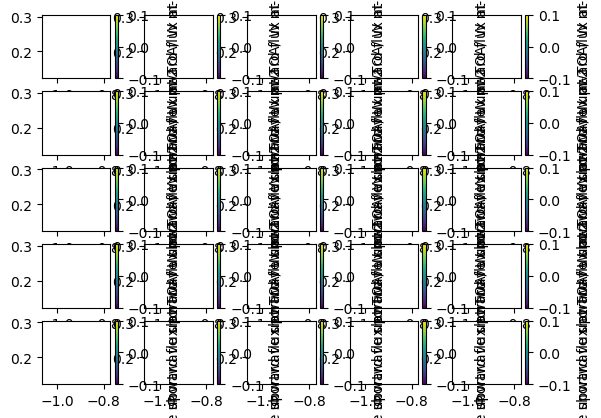

In [7]:
import matplotlib.pyplot as plt
import plot_utils as pu
import numpy as np

var = 'albedo'
var = 't_2m'
var = 'sou_t'

# d = data.mean(dim='time')
fig, axs = plt.subplots(5,5)
for i in range(25):
    ax = np.ravel(axs)[i]
    d = data.isel(time=i)
    pu.ax_triangles(ax, d, var)
fig.show()

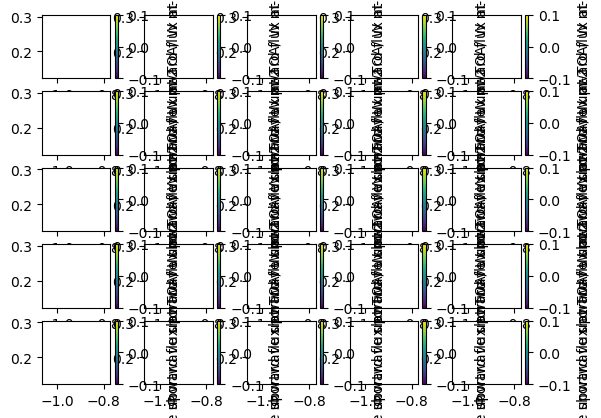

In [9]:
# d = data.mean(dim='time')
fig, axs = plt.subplots(5,5)
for i in range(25):
    ax = np.ravel(axs)[i]
    d = data.isel(time=25+i)
    pu.ax_triangles(ax, d, var)
fig.show()

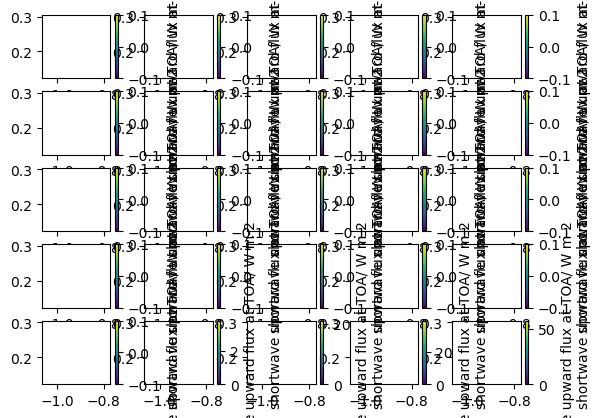

In [11]:
# d = data.mean(dim='time')
fig, axs = plt.subplots(5,5)
for i in range(25):
    ax = np.ravel(axs)[i]
    d = data.isel(time=50+i)
    pu.ax_triangles(ax, d, var)
fig.show()

ValueError: triangles are indices into the points and must be in the range 0 <= i < 2267417 but found value -2147483648

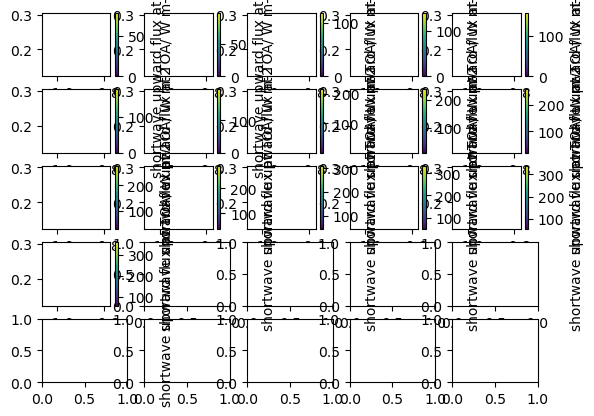

In [12]:
# d = data.mean(dim='time')
fig, axs = plt.subplots(5,5)
for i in range(25):
    ax = np.ravel(axs)[i]
    d = data.isel(time=75+i)
    pu.ax_triangles(ax, d, var)
fig.show()

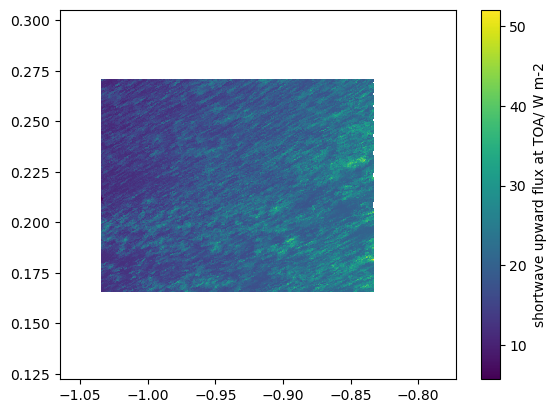

In [10]:
# d = data.mean(dim='time')
fig, ax = plt.subplots()
d = data.mean(dim='time',keep_attrs=True)
pu.ax_triangles(ax, d, var)
fig.show()

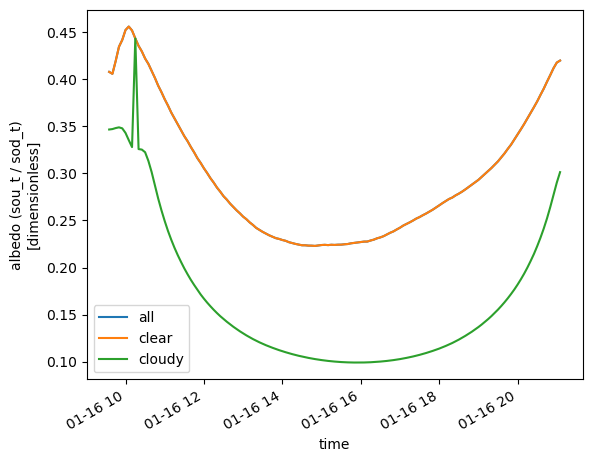

In [25]:
def load_data(exp_dir = '/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/', domain='DOM01', add_control=False):
    datasets = list()
    for kind in ['surface', 'radiation']:
        data = fh.disk_data_from_keywords(exp_dir, [kind, domain])
        data = pp.clean_surface_data(data)
        datasets.append(data)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.merge(datasets)
    if add_control:
        data = data.expand_dims(exp=('warming',))
        data = add_control(data, domain=domain)
    # data = data.isel(time=slice(2000,2100)) ####################DB
    # data = data.isel(time=slice(2000,2150)) ####################DB
    data = data.isel(time=slice(0,100)) ####################DB
    data = pp.add_grid(data, clean=False, drop_vars=False)
    data = pp.cut_borders(data, varnames={'cell':'cell', 'latitude':'clat', 'longitude':'clon'})
    data = filter_ice(data)
    return data


# len(time) == 2288
data = load_data(domain='DOM01')
data = add_albedo(data)

fig, ax = plt.subplots()
data.mean(dim='cell', skipna=True, keep_attrs=True)['albedo'].plot(ax=ax, label='all')
data.where(data.clct < 0.1).mean(dim='cell', skipna=True, keep_attrs=True)['albedo'].plot(ax=ax, label='clear')
data.where(data.clct > 0.9).mean(dim='cell', skipna=True, keep_attrs=True)['albedo'].plot(ax=ax, label='cloudy')
ax.legend()
fig.show()

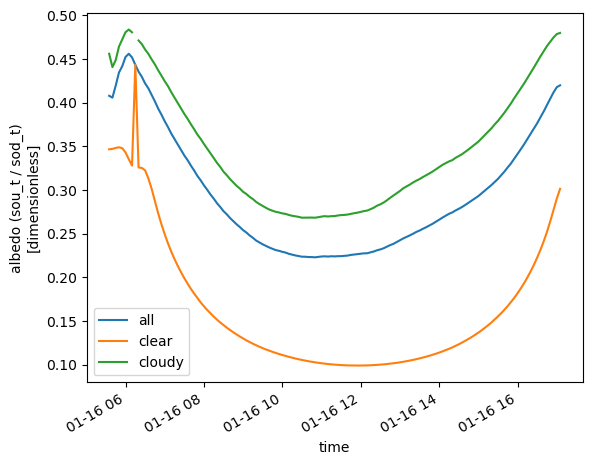

In [28]:
import pandas as pd

fig, ax = plt.subplots()

data = data.assign_coords(time=data['time'] - pd.Timedelta(hours=4)) # UTC to local time
data.mean(dim='cell', skipna=True, keep_attrs=True)['albedo'].plot(ax=ax, label='all')
data.where(data.clct < 0.1).mean(dim='cell', skipna=True, keep_attrs=True)['albedo'].plot(ax=ax, label='clear')
data.where(data.clct > 0.9).mean(dim='cell', skipna=True, keep_attrs=True)['albedo'].plot(ax=ax, label='cloudy')
ax.legend()
fig.show()

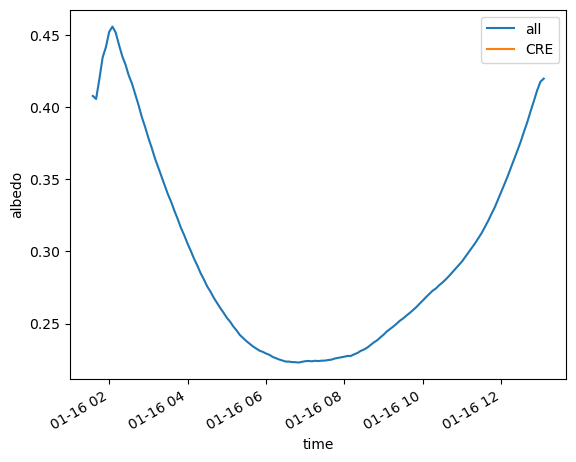

In [29]:
import pandas as pd

fig, ax = plt.subplots()

data = data.assign_coords(time=data['time'] - pd.Timedelta(hours=4)) # UTC to local time
data.mean(dim='cell', skipna=True, keep_attrs=True)['albedo'].plot(ax=ax, label='all')
cre = (data.where(data.clct > 0.9) - data.where(data.clct < 0.1)).mean(dim='cell', skipna=True, keep_attrs=True)['albedo']
cre.plot(ax=ax, label='CRE')

ax.legend()
fig.show()

In [4]:
import sys
import os
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)

import xarray as xr
import file_handling as fh
import postprocessing as pp
import metpy.units
from operator import add, sub, mul, truediv

def apply_operation_to_variables(dataset, var_name1, var_name2, operation_symbol, new_var_name=None):
    """
    Applies a specified operation to two variables in an xarray dataset and adds the result as a new variable.
    
    Attributes from the first variable are copied to the new variable with modifications.

    Parameters:
    - dataset: xarray.Dataset
        The dataset to modify.
    - var_name1: str
        The name of the first variable.
    - var_name2: str
        The name of the second variable.
    - operation_symbol: str
        The symbol of the operation to apply. Should be one of '+', '-', '*', '/'.
    - new_var_name: str, optional
        The name for the new variable.

    Returns:
    - xarray.Dataset
        The dataset with the new variable added.
    """
    if var_name1 not in dataset or var_name2 not in dataset:
        raise ValueError(f"Variables {var_name1} and/or {var_name2} not found in the dataset.")
    
    operations_map = {'+': add, '-': sub, '*': mul, '/': truediv}
    if operation_symbol not in operations_map:
        raise ValueError("Unsupported operation symbol. Choose from '+', '-', '*', '/'.")
    
    if new_var_name is None:
        new_var_name = f"{var_name1} {operation_symbol} {var_name2}"
    
    var1 = dataset[var_name1]
    var2 = dataset[var_name2]
    var1_unit = metpy.units.units(var1.attrs['units'])
    var2_unit = metpy.units.units(var2.attrs['units'])
    
    operation_func = operations_map[operation_symbol]
    
    # Handle units
    if operation_symbol in ['+', '-']:
        if var1_unit != var2_unit:
            raise ValueError("Units do not match for addition or subtraction.")
        result_unit = var1_unit
    elif operation_symbol == '*':
        result_unit = var1_unit * var2_unit
    elif operation_symbol == '/':
        result_unit = var1_unit / var2_unit
    
    # Perform the operation
    result_data = operation_func(var1, var2)
    
    dataset[new_var_name] = result_data
    original_attrs = var1.attrs.copy()
    original_attrs['long_name'] = f"{new_var_name} ({var_name1} {operation_symbol} {var_name2})"
    original_attrs['units'] = f"{result_unit.units}"
    dataset[new_var_name].attrs = original_attrs
    
    return dataset


def add_albedo(dataset):
    return apply_operation_to_variables(dataset, var_name1='sou_t', var_name2='sod_t', operation_symbol='/', new_var_name='albedo')

def add_sw_net(dataset):
    return apply_operation_to_variables(dataset, var_name1='sod_t', var_name2='sou_t', operation_symbol='-', new_var_name='sw_net')

def add_radiation_budget(dataset):
    return apply_operation_to_variables(dataset, var_name1='sob_t', var_name2='thb_t', operation_symbol='+', new_var_name='net_rad')

def load_data(exp_dir = '/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/', domain='DOM01', add_control=False):
    datasets = list()
    for kind in ['surface', 'radiation']:
        data = fh.disk_data_from_keywords(exp_dir, [kind, domain])
        data = pp.clean_surface_data(data)
        datasets.append(data)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.merge(datasets)
    if add_control:
        data = data.expand_dims(exp=('warming',))
        data = add_control(data, domain=domain)
    # data = data.isel(time=slice(2000,2100)) ####################DB
    # data = data.isel(time=slice(2000,2150)) ####################DB
    data = data.isel(time=slice(0,100)) ####################DB
    data = pp.add_grid(data, clean=False, drop_vars=False)
    data = pp.cut_borders(data, varnames={'cell':'cell', 'latitude':'clat', 'longitude':'clon'})
    data = filter_ice(data)
    return data


# len(time) == 2288
data = load_data(domain='DOM01')
data = add_albedo(data)
data = add_sw_net(data)
data = add_radiation_budget(data)
data

<xarray.Dataset>
Dimensions:                        (nc: 2, edge: 6795976, time: 100,
                                    cell: 2154774, vertex: 2267417, ne: 6,
                                    nv: 3, no: 4, max_chdom: 1, cell_grf: 14,
                                    edge_grf: 24, vert_grf: 13)
Coordinates:
    clat                           (cell) float64 9.501 9.5 ... 13.01 13.01
    clon                           (cell) float64 -47.75 -47.76 ... -51.37
    elat                           (edge) float64 dask.array<chunksize=(1698994,), meta=np.ndarray>
    elon                           (edge) float64 dask.array<chunksize=(1698994,), meta=np.ndarray>
    vlat                           (vertex) float64 dask.array<chunksize=(566854,), meta=np.ndarray>
    vlon                           (vertex) float64 dask.array<chunksize=(566854,), meta=np.ndarray>
  * cell                           (cell) int64 396191 396193 ... 4469911
  * time                           (time) datetime64[ns] 2020-01-09T10:00:00 ...
Dimensions without coordinates: nc, edge, vertex, ne, nv, no, max_chdom,
                                cell_grf, edge_grf, vert_grf
Data variables: (12/78)
    adjacent_cell_of_edge          (nc, edge, time, cell) float64 dask.array<chunksize=(2, 1698994, 100, 2154774), meta=np.ndarray>
    cartesian_x_vertices           (vertex, time, cell) float64 dask.array<chunksize=(566854, 100, 2154774), meta=np.ndarray>
    cartesian_y_vertices           (vertex, time, cell) float64 dask.array<chunksize=(566854, 100, 2154774), meta=np.ndarray>
    cartesian_z_vertices           (vertex, time, cell) float64 dask.array<chunksize=(566854, 100, 2154774), meta=np.ndarray>
    cell_area                      (cell, time) float64 dask.array<chunksize=(69085, 100), meta=np.ndarray>
    cell_area_p                    (cell, time) float64 dask.array<chunksize=(69085, 100), meta=np.ndarray>
    ...                             ...
    sou_s                          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    sob_s                          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    thb_s                          (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    albedo                         (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    sw_net                         (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
    net_rad                        (time, cell) float32 dask.array<chunksize=(6, 2154774), meta=np.ndarray>
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          6b59890b-99f3-939b-e76a-0a3ad2e43140
    uuidOfParHGrid:       39f9d5e2-322c-11e6-beee-d15f30d0a215

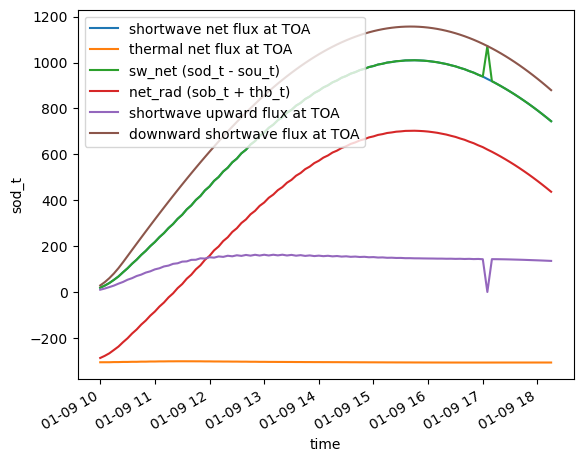

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for var in ['sob_t', 'thb_t', 'sw_net', 'net_rad', 'sou_t', 'sod_t']:
    data.mean(dim='cell')[var].plot(ax=ax, label=data[var].attrs['long_name'])
ax.legend()
fig.show()

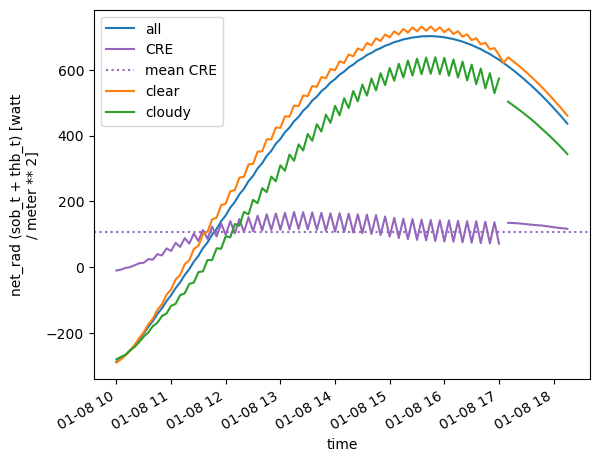

In [41]:
import pandas as pd

fig, ax = plt.subplots()

data = data.assign_coords(time=data['time'] - pd.Timedelta(hours=4)) # UTC to local time
data.mean(dim='cell', skipna=True, keep_attrs=True)['net_rad'].plot(ax=ax, label='all')

clear  = data.where(data.clct < 0.1).mean(dim='cell', skipna=True, keep_attrs=True)['net_rad']
cloudy = data.where(data.clct > 0.9).mean(dim='cell', skipna=True, keep_attrs=True)['net_rad']
cre = clear - cloudy

cre.plot(ax=ax, label='CRE', color='tab:purple')
ax.axhline(np.nanmean(cre.values), color='tab:purple', label='mean CRE', ls=':')
clear.plot(ax=ax, label='clear')
cloudy.plot(ax=ax, label='cloudy')

# (data.where(data.clct < 0.1) - data.where(data.clct > 0.9)).mean(dim='cell', skipna=True, keep_attrs=True)['net_rad'].plot(ax=ax, label='diff')
ax.legend()
fig.show()

In [43]:
(155-76)  / 6

13.166666666666666

In [44]:
20/13

1.5384615384615385

In [15]:
import sys
import os
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)

import xarray as xr
import file_handling as fh
import postprocessing as pp
import pandas as pd

def add_albedo(dataset):
    return pp.apply_operation_to_variables(dataset, var_name1='sou_t', var_name2='sod_t', operation_symbol='/', new_var_name='albedo')

def add_sw_net(dataset):
    return pp.apply_operation_to_variables(dataset, var_name1='sou_t', var_name2='sod_t', operation_symbol='+', new_var_name='sw_net')

def add_radiation_budget(dataset):
    return pp.apply_operation_to_variables(dataset, var_name1='sob_t', var_name2='thb_t', operation_symbol='+', new_var_name='net_rad')

def filter_ice(dataset, threshold=1e-4):
    data = pp.add_threshold_indicator(dataset, variable_name='tqi_dia', threshold=threshold, new_variable_name='high_tqi', long_name='ice cloud mask', boolean=False)
    data = data.where((data['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
    return data

def add_control(input_data, domain='DOM01'):
    datasets = list()
    for kind in ['surface', 'radiation']:
        data = fh.eureca_data_from_keywords([kind, domain])
        datasets.append(data)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.merge(datasets)
    data = data.expand_dims(exp=('control',))

    datasets = [input_data, data]
    datasets = pp.filter_common_vars(datasets)
    datasets = pp.subset_time_overlap(datasets)
    return xr.concat(datasets, dim='exp')
    
def load_data(file):
    data = xr.open_mfdataset([file, file.replace('surface','radiation')])
    data = pp.clean_surface_data(data)
    existing_variables = list(data)
    data = data.expand_dims(exp=('warming',))
    data = add_control(data, domain=domain)
    return data

def filter_data(data):
    data = pp.add_grid(data)
    data = pp.cut_borders(data)
    data = filter_ice(data)
    return data

def add_derived_quantities(data):
    data = add_albedo(data)
    data = add_sw_net(data)
    data = add_radiation_budget(data)
    return data

def separate_cloudy_cells(data):
    clear  = data.where(data.clct < 0.1).mean(dim='cell', skipna=True, keep_attrs=True)
    cloudy = data.where(data.clct > 0.9).mean(dim='cell', skipna=True, keep_attrs=True)
    clear = pp.rename_variables(clear, 'cs_', 'mean clear sky ')
    cloudy = pp.rename_variables(cloudy, 'cl_', 'mean cloudy ')
    data = xr.merge([clear,cloudy])
    return data

for ifile in fh.disk_data_from_keywords(exp_dir, [kind, domain], return_file_list=1):
    exp_dir = '/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/'
    domain = 'DOM01'
    kind = 'surface'
    print(ifile)
    ofile = ifile.replace('surface','cloudmaskedmean')
    data = load_data(ifile)
    data = filter_data(data)
    data = add_derived_quantities(data)
    data = separate_cloudy_cells(data)
    data.to_netcdf('test.nc')
    print('\tDONE', flush=True)


/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/moist_adiabatic_05_DOM01_surface_20200109T100000Z.nc


/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


	DONE
/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/moist_adiabatic_05_DOM01_surface_20200109T103000Z.nc
	DONE


In [16]:
d = xr.open_dataset('test.nc')
os.remove('test.nc')
d

<xarray.Dataset>
Dimensions:           (exp: 2, time: 3)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-09T10:30:00 ... 2020-01-0...
  * exp               (exp) object 'warming' 'control'
Data variables: (12/44)
    cs_sod_t          (exp, time) float32 ...
    cs_tqc_dia        (exp, time) float32 ...
    cs_t_seasfc       (exp, time) float32 ...
    cs_rain_gsp_rate  (exp, time) float32 ...
    cs_qv_2m          (exp, time) float32 ...
    cs_v_10m          (exp, time) float32 ...
    ...                ...
    cl_u_10m          (exp, time) float32 ...
    cl_tot_prec       (exp, time) float32 ...
    cl_sob_t          (exp, time) float32 ...
    cl_albedo         (exp, time) float32 ...
    cl_sw_net         (exp, time) float32 ...
    cl_net_rad        (exp, time) float32 ...
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          6b59890b-99f3-939b-e76a-0a3ad2e43140
    uuidOfParHGrid:       39f9d5e2-322c-11e6-beee-d15f30d0a215

In [ ]:
fh.disk_data_from_keywords()

In [ ]:
#!/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/bin/python                                                                
#SBATCH --partition=compute
#SBATCH --account=mh1126
#SBATCH --nodes=1
#SBATCH --time=05:00:00
#SBATCH --mail-type=fail,end
#SBATCH --mail-user=hernan.campos@mpimet.mpg.de
#SBATCH --output=%j_%x.log

import sys
import os
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)

import xarray as xr
import file_handling as fh
import postprocessing as pp
import pandas as pd

def add_albedo(dataset):
    return pp.apply_operation_to_variables(dataset, var_name1='sou_t', var_name2='sod_t', operation_symbol='/', new_var_name='albedo')

def add_sw_net(dataset):
    return pp.apply_operation_to_variables(dataset, var_name1='sou_t', var_name2='sod_t', operation_symbol='-', new_var_name='sw_net')

def add_radiation_budget(dataset):
    return pp.apply_operation_to_variables(dataset, var_name1='sob_t', var_name2='thb_t', operation_symbol='+', new_var_name='net_rad'

def filter_ice(dataset, threshold=1e-4):
    data = pp.add_threshold_indicator(dataset, variable_name='tqi_dia', threshold=threshold, new_variable_name='high_tqi', long_name='
    data = data.where((data['high_tqi'] == 0).compute()).drop_vars(['high_tqi'])
    return data

def add_control(input_data, domain='DOM01'):
    datasets = list()
    for kind in ['surface', 'radiation']:
        data = fh.eureca_data_from_keywords([kind, domain])
        datasets.append(data)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.merge(datasets)
    data = data.expand_dims(exp=('control',))

    datasets = [input_data, data]
    datasets = pp.filter_common_vars(datasets)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.concat(datasets, dim='exp')
    # print('w',data.dims, flush=True)
    return data

def load_data(file):
    data = xr.open_mfdataset([file, file.replace('surface','radiation')])
    data = pp.clean_surface_data(data)
    existing_variables = list(data)
    data = data.expand_dims(exp=('warming',))
    # print('c',data.dims, flush=True)
    data = add_control(data, domain=domain)
    return data

def filter_data(data):
    data = pp.add_grid(data)
    data = pp.cut_borders(data)
    data = filter_ice(data)
    return data

def add_derived_quantities(data):
    data = add_albedo(data)
    data = add_sw_net(data)
    data = add_radiation_budget(data)
    return data
                                      
def separate_cloudy_cells(data):
    clear  = data.where(data.clct < 0.1).mean(dim='cell', skipna=True, keep_attrs=True)
    cloudy = data.where(data.clct > 0.9).mean(dim='cell', skipna=True, keep_attrs=True)
    clear = pp.rename_variables(clear, 'cs_', 'mean clear sky ')
    cloudy = pp.rename_variables(cloudy, 'cl_', 'mean cloudy ')
    data = xr.merge([clear,cloudy])
    return data


exp_dir = '/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/'
domain = 'DOM01'
kind = 'surface'
file_slice = slice(300, None)
print('slice: ', file_slice, flush=True)

for ifile in fh.disk_data_from_keywords(exp_dir, [kind, domain], return_file_list=1)[slice]:
    ofile = ifile.replace('surface','cloudmaskedmean')
    print(ofile, flush=True)
    if os.path.exists(ofile):
        print('\tEXISTS', flush=True)
    else:
        data = load_data(ifile)
        data = filter_data(data)
        data = add_derived_quantities(data)
        data = separate_cloudy_cells(data)
        data.to_netcdf(ofile)
        print('\tDONE', flush=True)        

<xarray.Dataset>
Dimensions:           (exp: 2, time: 1050)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-09T10:00:00 ... 2020-01-1...
  * exp               (exp) object 'warming' 'control'
Data variables: (12/44)
    cs_clct           (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    cs_rh_2m          (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    cs_tot_prec       (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    cs_shfl_s         (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    cs_tqi_dia        (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    cs_tqc_dia        (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    ...                ...
    cl_sod_t          (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    cl_u_10m          (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    cl_t_2m           (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    cl_albedo         (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    cl_sw_net         (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    cl_net_rad        (exp, time) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          6b59890b-99f3-939b-e76a-0a3ad2e43140
    uuidOfParHGrid:       39f9d5e2-322c-11e6-beee-d15f30d0a215

In [13]:
import sys
import os
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)

import file_handling as fh
import postprocessing as pp
import numpy as np

def get_cloudmasked_data(exp_dir='/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/',
                         domain='DOM01',
                         kind='cloudmaskedmean'):
    data = fh.disk_data_from_keywords(exp_dir, [kind, domain])

    data = data.resample(time='D').mean(keep_attrs=True)
    data = data.isel(time=slice(1,-1)) # first day is not a full day and give strange means
    data = pp.add_arithmetic_variable(data, 'cl_sou_t', 'cl_sod_t', '-', new_var_name='cl_net_sw2',)
    data = pp.add_arithmetic_variable(data, 'cs_sou_t', 'cs_sod_t', '-', new_var_name='cs_net_sw2',)
    data = pp.add_arithmetic_variable(data, 'cl_net_sw2', 'cl_thb_t', '+', new_var_name='cl_netrad',)
    data = pp.add_arithmetic_variable(data, 'cs_net_sw2', 'cs_thb_t', '+', new_var_name='cs_netrad',)
    data = pp.add_arithmetic_variable(data, 'cs_netrad', 'cl_netrad', '-', new_var_name='CRE',)
    return data

/home/m/m300872/warm_eurec4a/submodules/file_handling.py:951: UserWarning: There might have been a problem with double output for some time steps. Data was loaded with `concat_dim='time'` and sorted via `dataset.sortby(dataset['time'])`. Check the time axis!
  if not supress_warning: warnings.warn(


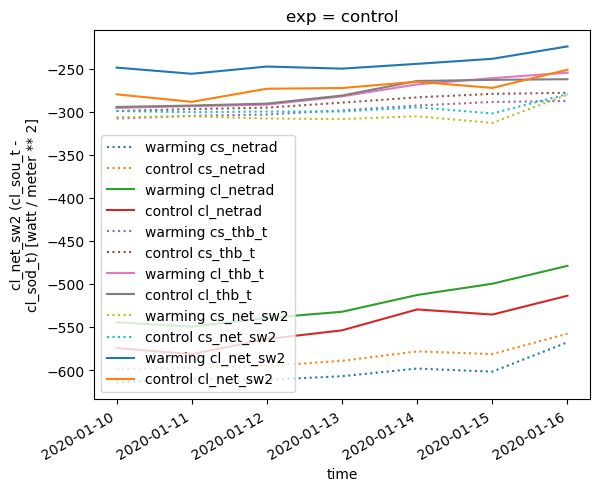

In [14]:
import matplotlib.pyplot as plt
import plot_utils as pu

data = get_cloudmasked_data()
fig, ax = plt.subplots()

for variable, color in zip(['netrad', 'thb_t', 'net_sw2'], ['tab:purple','tab:red','tab:blue']):
    var = f'cs_{variable}'
    for exp in data.exp.values:
        data.sel(exp=exp)[var].plot(ax=ax, label=f'{exp} {var}', ls=':')
    var = f'cl_{variable}'
    for exp in data.exp.values:
        data.sel(exp=exp)[var].plot(ax=ax, label=f'{exp} {var}')

ax.legend()
fig.show()

In [15]:
data = get_cloudmasked_data()

/home/m/m300872/warm_eurec4a/submodules/file_handling.py:951: UserWarning: There might have been a problem with double output for some time steps. Data was loaded with `concat_dim='time'` and sorted via `dataset.sortby(dataset['time'])`. Check the time axis!
  if not supress_warning: warnings.warn(


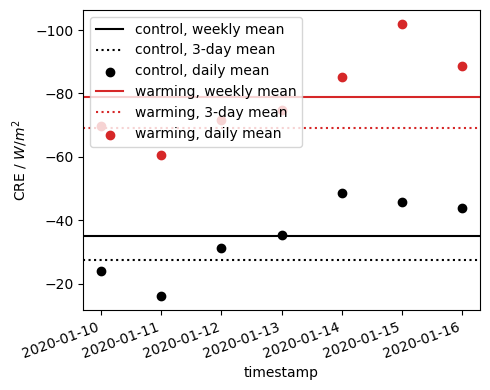

In [18]:
import matplotlib.pyplot as plt
import plot_utils as pu

def fig_cre_time_mean(data, time_slice=slice(0,4)):
    var = 'CRE'
    fig, ax = plt.subplots(figsize=(5,4))

    for exp, color in zip(['control', 'warming'], ['black', 'tab:red']):
        y = data.sel(exp=exp)[var]
        ax.axhline(np.mean(y.values), color=color, label=f'{exp}, weekly mean')
        ax.axhline(np.mean(y.values[time_slice]), color=color, ls=':', label=f'{exp}, 3-day mean')
        ax.scatter(data.time, y, label=f'{exp}, daily mean', color=color)
        ax.set_xlabel('timestamp')
        ax.set_ylabel(f'CRE / $W/m^2$')
        pu.rotate_xticks(ax, 20)

    ax.set_ylim(ax.get_ylim()[::-1])
    ax.legend()
    fig.tight_layout()
    return fig, ax

fig, ax = fig_cre_time_mean(data, time_slice=slice(1,4))
filename = 'img/fig_cre_first_week.svg'
try:    os.remove(filename)
except: pass
fig.savefig(filename)
fig.show()

In [ ]:
import xarray as xr

def get_cloudmasked_data_plus(exp_dir='/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/',
                         domain='DOM01',
                         kind='cloudmaskedmean'):
    data = fh.disk_data_from_keywords(exp_dir, [kind, domain])
    data = data.resample(time='D').mean(keep_attrs=True)
    # data = data.isel(time=slice(1,-1)) # first day is not a full day and give strange means
    data = pp.add_arithmetic_variable(data, 'cl_sou_t', 'cl_sod_t', '-', new_var_name='cl_net_sw2')
    data = pp.add_arithmetic_variable(data, 'cs_sou_t', 'cs_sod_t', '-', new_var_name='cs_net_sw2')
    data = pp.add_arithmetic_variable(data, 'cl_net_sw2', 'cl_thb_t', '+', new_var_name='cl_netrad')
    data = pp.add_arithmetic_variable(data, 'cs_net_sw2', 'cs_thb_t', '+', new_var_name='cs_netrad')
    data = pp.add_arithmetic_variable(data, 'cs_netrad', 'cl_netrad', '-', new_var_name='CRE')
    datasets = [data]
    data = fh.disk_data_from_keywords(exp_dir, ['domainmean', domain])
    data = data.resample(time='D').mean(keep_attrs=True)
    datasets.append(data)
    datasets = pp.time_overlap(datasets)
    data = xr.merge(datasets)
    return data

get_cloudmasked_data_plus()

KeyError: 'clct'

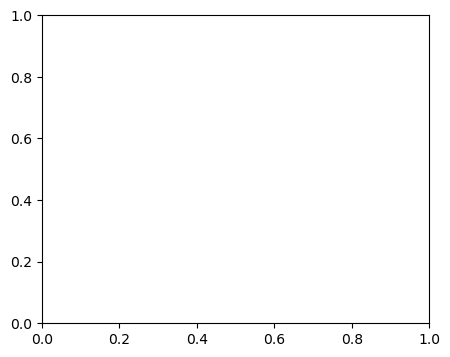

In [7]:
def fig_time_mean_clct(data, time_slice=slice(1,4)):
    var = 'clct'
    fig, ax = plt.subplots(figsize=(5,4))

    for exp, color in zip(['control', 'warming'], ['black', 'tab:red']):
        y = data.sel(exp=exp)[var]
        ax.axhline(np.mean(y.values), color=color, label=f'{exp}, weekly mean')
        ax.axhline(np.mean(y.values[time_slice]), color=color, ls=':', label=f'{exp}, 3-day mean')
        ax.scatter(data.time, y, label=f'{exp}, daily mean', color=color)
        ax.set_xlabel('timestamp')
        ax.set_ylabel(f'CRE / $W/m^2$')
        pu.rotate_xticks(ax, 20)

    ax.legend()
    fig.tight_layout()
    return fig, ax

fig, ax = fig_time_mean_clct(data, time_slice=slice(1,4))
filename = 'img/fig_time_mean_clct.svg'
try:    os.remove(filename)
except: pass
fig.savefig(filename)
fig.show()time_overlap

In [12]:
import xarray as xr 

def add_control(input_data, domain='DOM01'):
    datasets = list()
    for kind in ['surface', 'radiation']:
        data = fh.eureca_data_from_keywords([kind, domain])
        datasets.append(data)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.merge(datasets)
    data = data.expand_dims(exp=('control',))
    data = data.mean(dim='cell')

    datasets = [input_data, data]
    datasets = pp.filter_common_vars(datasets)
    datasets = pp.subset_time_overlap(datasets)
    data = xr.concat(datasets, dim='exp')
    return data

exp_dir = '/work/mh1126/m300872/eureca_icon/EUREC4A/experiments/moist_adiabatic_05/'
domain = 'DOM01'
kind = 'domainmean'
data = fh.disk_data_from_keywords(exp_dir, [kind, domain])
data = data.expand_dims(exp=('warming',))
data = data.sel({'quantile':-1})
data = add_control(data, domain=domain)
data = data.resample(time='D').mean(keep_attrs=True)
data = data.isel(time=slice(1,None)) # first day is not a full day and give strange means

data = pp.add_arithmetic_variable(data, 'sou_t',  'sod_t', '-', new_var_name='sw_net',)
data = pp.add_arithmetic_variable(data, 'sw_net', 'thb_t', '+', new_var_name='rad_net',)

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/xarray/core/indexing.py:1440: PerformanceWarning: Slicing with an out-of-order index is generating 12 times more chunks
  return self.array[key]
/home/m/m300872/warm_eurec4a/submodules/file_handling.py:951: UserWarning: There might have been a problem with double output for some time steps. Data was loaded with `concat_dim='time'` and sorted via `dataset.sortby(dataset['time'])`. Check the time axis!
  if not supress_warning: warnings.warn(


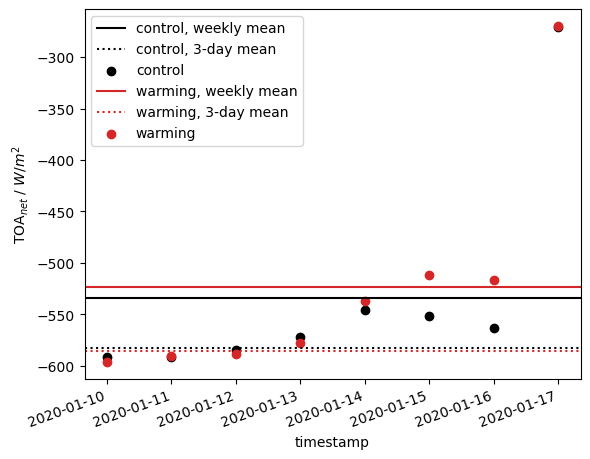

In [13]:
fig, ax = plt.subplots()

var  = 'rad_net'
for exp, color in zip(['control', 'warming'], ['black', 'tab:red']):
    y = data.sel({'exp':exp})[var]
    ax.axhline(np.mean(y.values), color=color, label=f'{exp}, weekly mean')
    ax.axhline(np.mean(y.values[time_slice]), color=color, ls=':', label=f'{exp}, 3-day mean')
    # ax.axhline(np.mean(y.values), color=color)
    ax.scatter(data.time, y, label=f'{exp}', color=color)

ax.set_xlabel('timestamp')
ax.set_ylabel(f'TOA$_{{net}}$ / $W/m^2$')
pu.rotate_xticks(ax, 20)
ax.legend()
fig.show()

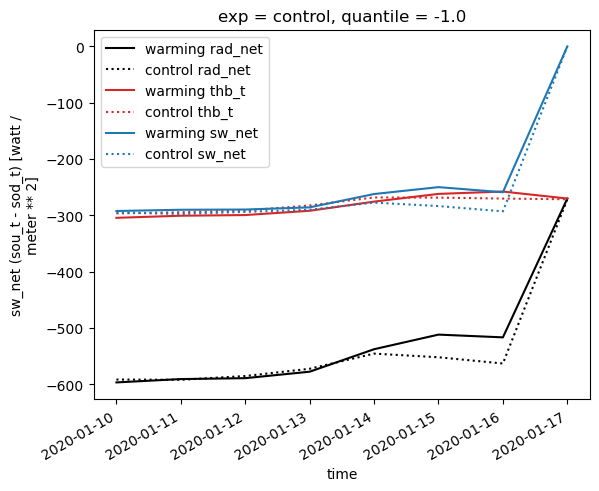

In [61]:
import matplotlib.pyplot as plt
import plot_utils as pu

fig, ax = plt.subplots()

for var, color in zip(['rad_net', 'thb_t', 'sw_net'], ['black','tab:red','tab:blue']):
    for exp, ls in zip(data.exp.values, ['-',':']):
        data.sel(exp=exp)[var].plot(ax=ax, label=f'{exp} {var}', ls=ls, color=color)

ax.legend()
fig.show()

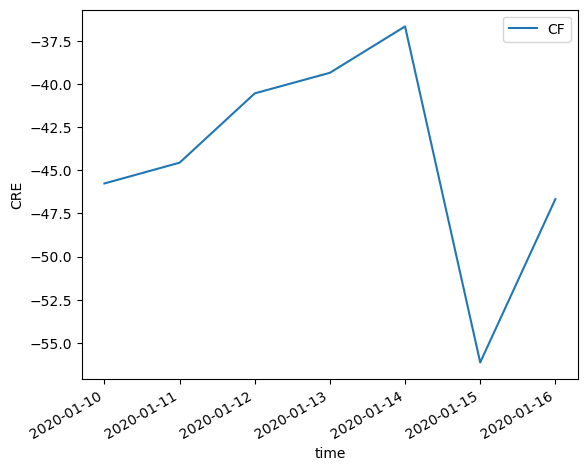

In [33]:
cf = daily_averages.sel(exp='warming')['CRE'] - daily_averages.sel(exp='control')['CRE']

fig, ax = plt.subplots()

# daily_averages = data.resample(time='D').mean(keep_attrs=True)
# daily_averages = daily_averages.isel(time=slice(1,None)) # first day is not a full day and give strange means

# daily_averages = pp.add_arithmetic_variable(daily_averages, 'cl_sou_t', 'cl_sod_t', '-', new_var_name='cl_net_sw2',)
# daily_averages = pp.add_arithmetic_variable(daily_averages, 'cs_sou_t', 'cs_sod_t', '-', new_var_name='cs_net_sw2',)
# daily_averages = pp.add_arithmetic_variable(daily_averages, 'cl_net_sw2', 'cl_thb_t', '+', new_var_name='cl_netrad',)
# daily_averages = pp.add_arithmetic_variable(daily_averages, 'cs_net_sw2', 'cs_thb_t', '+', new_var_name='cs_netrad',)
# daily_averages = pp.add_arithmetic_variable(daily_averages, 'cs_netrad', 'cl_netrad', '-', new_var_name='CRE',)

# # for variable, color in zip(['netrad', 'thb_t', 'net_sw2'], ['tab:purple','tab:red','tab:blue']):
# #     var = f'cs_{variable}'
# #     for exp in data.exp.values:
# #         daily_averages.sel(exp=exp)[var].plot(ax=ax, label=f'{exp} {var}', ls=':')
# #     var = f'cl_{variable}'
# #     for exp in data.exp.values:
# #         daily_averages.sel(exp=exp)[var].plot(ax=ax, label=f'{exp} {var}')

# var  = 'CRE'
# for exp in data.exp.values:
#     daily_averages.sel(exp=exp)[var].plot(ax=ax, label=f'{exp} {var}')

cf.plot(ax=ax, label=f'CF')
    
ax.legend()
fig.show()